# 1. Product-CLT

In [131]:
import random, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n=100
samples =10000
def prod_CLT(n, samples):
    D=np.zeros((samples,1))
    for i in range(len(D)):
        x = np.random.normal(0,1,(n,))
        z = np.random.normal(0,1,(n,))
        D[i] = (x.dot(z))/(n**0.5)
    return D
D =prod_CLT(n, samples)
def prod_CLT_one(n):
    x = np.random.normal(0,1,(n,))
    z = np.random.normal(0,1,(n,))
    return (x.dot(z))/(n**0.5)


- plot 10000 samples of  $$D = \frac{1}{\sqrt{n}}\sum X_i Z_i$$

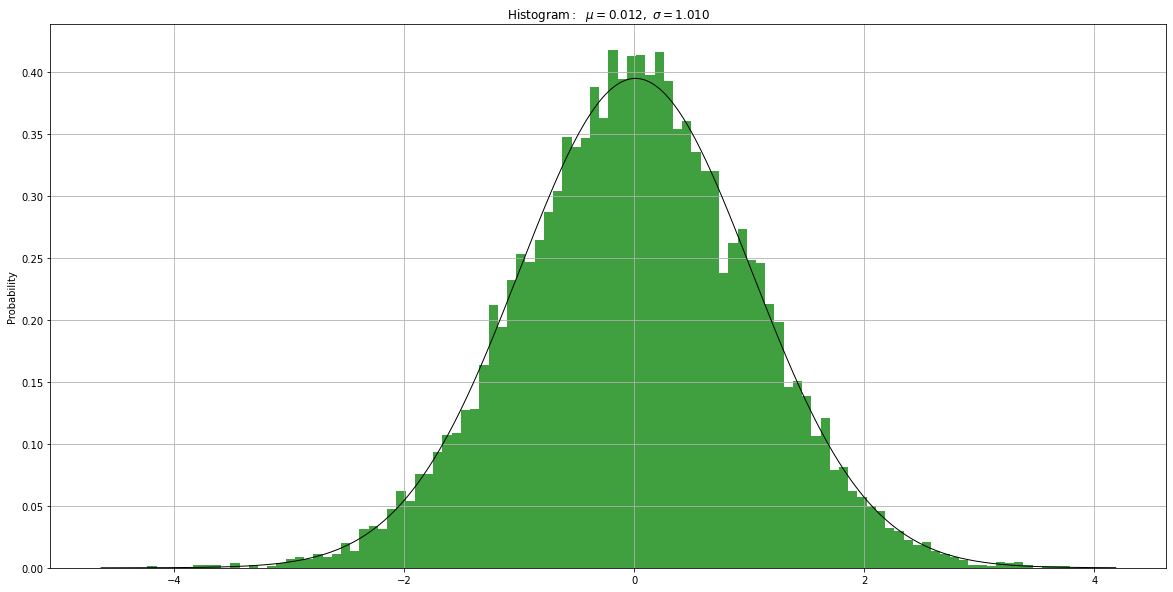

In [132]:

# best fit of data
(mu, std) = norm.fit(D)

# the histogram of the data
plt.figure(figsize=(20,10))
plt.hist(D, 100, density = True, facecolor='green', alpha=0.75)

# add a 'fited normal' density
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

#plot
plt.xlabel('')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram:\ }\ \mu=%.3f,\ \sigma=%.3f$' %(mu, std))
plt.grid(True)

plt.show()

- computes empirical cdf error to see the rate of convergence

The following picture exhibits behavior of Browninan motion. This is the reasonable since the errors are not independent, but rather the consecutive differences are going to be independent.

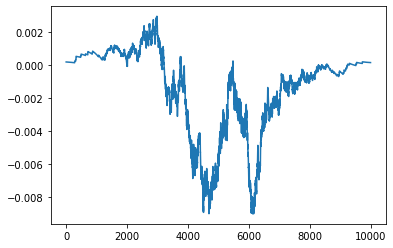

Average absolute difference of CDF between D and standard normal, 0.001964


In [133]:
def cdf_diff(X):
    t =  np.linspace(-4, 4, 10000)
    standard_cdf = norm.cdf(t, 0, 1)
    def empirical_cdf(X,t):
        X.sort(axis=0) #increasing order
        X= np.squeeze(X) # orginally (n,1), remove column index --> (n,)
        # side='right' because we want Pr(X <= t)
        return (np.searchsorted(X, t, side='right') + 1) / len(X)
    X_cdf = empirical_cdf(D,t)
    return X_cdf - standard_cdf
diff = cdf_diff(D)
plt.plot(diff)
plt.show()
print('Average absolute difference of CDF between D and standard normal, %.6f' %abs(diff).mean())

In [134]:
k=10
samples =1000
n_list =  [i*100 for i in range(1,k+1)]
result = np.zeros(k)
for i in range(k):
    D= prod_CLT(n_list[i], samples)
    diff = cdf_diff(D)
    result[i] = abs(diff).max() # look at max since we error is bounded by 1/sqrt(n)

- Plot the CDF abs-error
From the picture, we do not observe a $O(\frac{1}{\sqrt{n}})$ pattern, this is because vector dimensions $n$ are too close, the rate is not distinguishable.

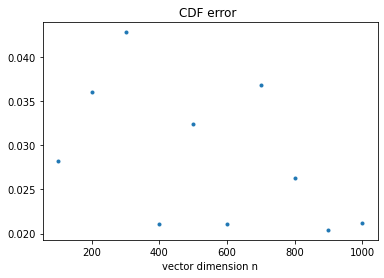

In [135]:
plt.plot(n_list, result,'.')
plt.xlabel('vector dimension n')
plt.title('CDF error ')
plt.show()

# 2. Random projection Product-CLT

In [136]:
m=10
n=1000
samples =1000
def Rand_prod_CLT(n, m, samples):
    D=np.zeros((samples,1))
    for i in range(len(D)):
        x = np.random.normal(0,1,(n,))
        z = np.random.normal(0,1,(n,))
        S = np.random.normal(0,1,(m,n))
        x = S.dot(x)
        z = S.dot(z)
        D[i] = (x.dot(z))/(n* m**0.5)
    return D
D = Rand_prod_CLT(n, m, samples)

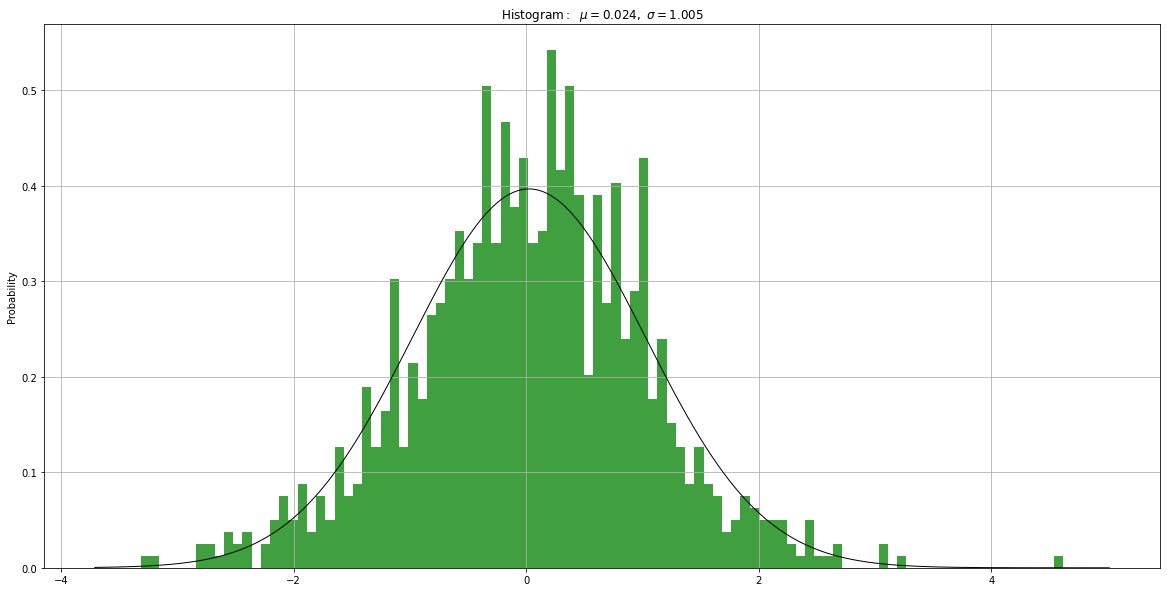

In [137]:

# best fit of data
(mu, std) = norm.fit(D)

# the histogram of the data
plt.figure(figsize=(20,10))
plt.hist(D, 100, density = True, facecolor='green', alpha=0.75)

# add a 'fited normal' density
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

#plot
plt.xlabel('')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram:\ }\ \mu=%.3f,\ \sigma=%.3f$' %(mu, std))
plt.grid(True)

plt.show()

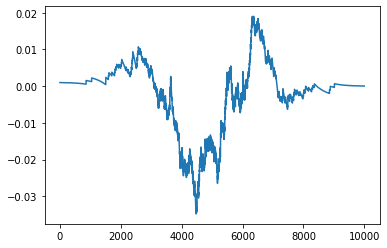

Average absolute difference of CDF between D and standard normal, 0.006026


In [138]:
diff = cdf_diff(D)
plt.plot(diff)
plt.show()
print('Average absolute difference of CDF between D and standard normal, %.6f' %abs(diff).mean())

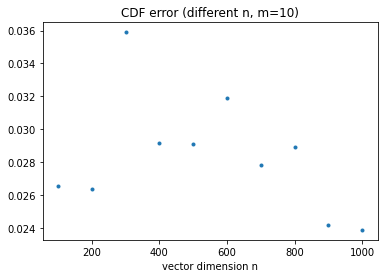

In [139]:
k=10
m=10
samples =1000
n_list =  [i*100 for i in range(1,k+1)]
result = np.zeros(k)
for i in range(k):
    D= Rand_prod_CLT(n_list[i], m, samples)
    diff = cdf_diff(D)
    result[i] = abs(diff).max()

plt.plot(n_list, result,'.')
plt.xlabel('vector dimension n')
plt.title(f'CDF error (different n, m={m})')
plt.show()

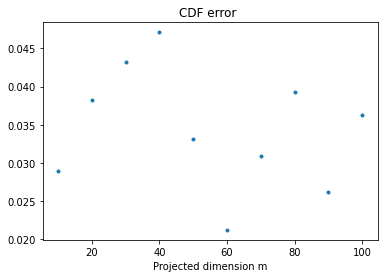

In [140]:
k=10
samples =1000
n= 1000
m_list =  [i*10 for i in range(1,k+1)]
result = np.zeros(k)
for i in range(k):
    D= Rand_prod_CLT(n, m_list[i], samples)
    diff = cdf_diff(D)
    result[i] = abs(diff).max()

plt.plot(m_list, result,'.')
plt.xlabel('Projected dimension m')
plt.title('CDF error ')
plt.show()

# 3. Conclusion

The convergence to normal distribution is verified in both cases. Due to both theoretical and computational power limitations, the rate of convergence is not verified. Specifically the theoretical limitations comes from the berry-esseen type rate is only a bound on the order of the error which could fluctutate very much with different parameters.